In [ ]:
#@title Vgg19

In [ ]:
#@title Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os
import keras
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.utils as image
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import load_model
from keras.models import Sequential
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.layers import Input, Dense, Flatten, Dropout

In [2]:
#@title Preparing The Data
data_dir="C:/Users/chand/Documents/Visual_Studio/Project/Classification/Dataset/640A/cashew/train"
data_dir = pathlib.Path(data_dir)

In [3]:
img_height,img_width=(224,224)
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5670 files belonging to 3 classes.
Using 4536 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5670 files belonging to 3 classes.
Using 1134 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Overripe', 'Ripe', 'Unripe']


In [6]:
vgg=VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))

for layer in vgg.layers:
  layer.trainable=False

x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
epoch=50

my_callbacks = [
    # save logs while training in csv file
    keras.callbacks.CSVLogger('C:/Users/chand/Documents/Github/Vgg19/Logs/log.csv', separator=",", append=False),
    # keras.callbacks.EarlyStopping(monitor="val_loss",patience=5)
    ]

In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])


In [10]:
#@title Train your model
history =model.fit(train_ds,validation_data=val_ds,
                     epochs=epoch,
                     callbacks=[my_callbacks],
                     batch_size=32,verbose=1)

Epoch 1/50
142/142 [==============================] - 40s 201ms/step - loss: 6.5143 - accuracy: 0.7251 - val_loss: 5.4250 - val_accuracy: 0.7928
Epoch 2/50
142/142 [==============================] - 29s 201ms/step - loss: 1.7401 - accuracy: 0.9151 - val_loss: 4.1365 - val_accuracy: 0.8413
Epoch 3/50
142/142 [==============================] - 33s 236ms/step - loss: 0.7195 - accuracy: 0.9544 - val_loss: 4.9452 - val_accuracy: 0.8289
Epoch 4/50
142/142 [==============================] - 37s 260ms/step - loss: 0.6420 - accuracy: 0.9625 - val_loss: 4.3243 - val_accuracy: 0.8624
Epoch 5/50
142/142 [==============================] - 39s 273ms/step - loss: 0.4630 - accuracy: 0.9672 - val_loss: 4.9481 - val_accuracy: 0.8492
Epoch 6/50
142/142 [==============================] - 41s 291ms/step - loss: 0.2439 - accuracy: 0.9808 - val_loss: 5.0847 - val_accuracy: 0.8545
Epoch 7/50
142/142 [==============================] - 44s 308ms/step - loss: 0.6906 - accuracy: 0.9700 - val_loss: 6.3052 - val_ac

In [11]:
#@title save final model
model.save('C:/Users/chand/Documents/Github/Vgg19/Model/model.h5')

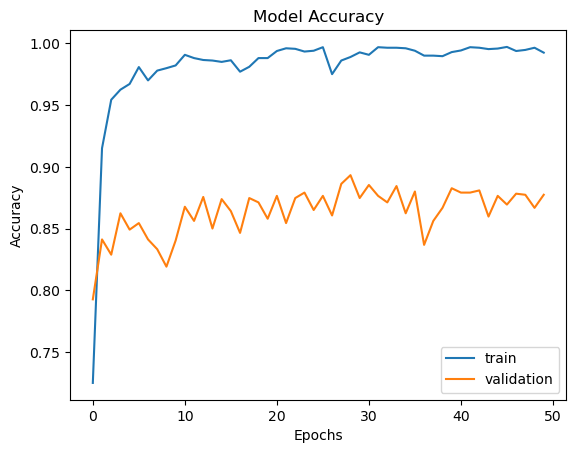

In [12]:
#@title accuracy graph
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

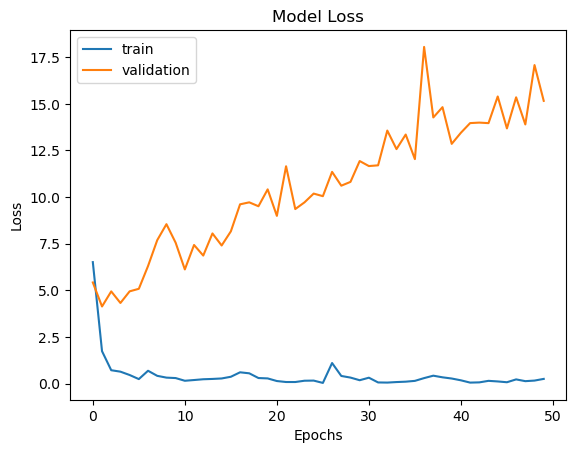

In [13]:
#@title loss graph
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Confusion Matrix

In [3]:
image_generator = keras.preprocessing.image.ImageDataGenerator()
test_data="C:/Users/chand/Documents/Visual_Studio/Project/Classification/Dataset/640A/cashew/test"
test_image_data  = image_generator.flow_from_directory(test_data,target_size=(224,224), batch_size=700)

Found 630 images belonging to 3 classes.


In [4]:
for image_batch, label_batch in test_image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (630, 224, 224, 3)
Label batch shape:  (630, 3)


In [5]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
label_id = np.argmax(label_batch, axis=-1)

20/20 [==============================] - 46s 2s/step


In [6]:
from sklearn.metrics import classification_report
target_names = ['overripe', 'ripe', 'unripe']
print(classification_report(label_id, predicted_id, zero_division=0, target_names=target_names))

              precision    recall  f1-score   support

    overripe       0.55      0.83      0.67       210
        ripe       0.48      0.36      0.41       210
      unripe       0.85      0.64      0.73       210

    accuracy                           0.61       630
   macro avg       0.63      0.61      0.60       630
weighted avg       0.63      0.61      0.60       630



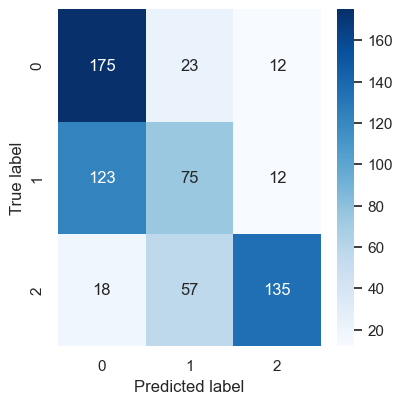

In [7]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

# Compute confusion matrix
con_mat = tf.math.confusion_matrix(labels=label_id, predictions=predicted_id)

# Create the plot
figure = plt.figure(figsize=(4,4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# **Load Model**

In [2]:
# Load the trained model
model = load_model("C:/Users/chand/Documents/Github/Vgg19/Model/model.h5")